## pydANN ( python deep Artificial Neural Network )

is a free and open source python library to implement the Machine Learning algorithm of neural networks
The network can be as simple as a sinle layer perceptron net or a multi-layer deep neural net.
THe design and modifications of this library is posted [here](https://www.github.com/ShimronAlakkal)


### 1 - Packages

These are some of the most important packages that you're going to need in order to use ***```pydANN```***

- [numpy](www.numpy.org) (or numeric python) is the main package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a library to plot graphs -- which are optional -- in Python.
- [pickle](https://docs.python.org/3/library/pickle.html) is the library pydANN uses to save your trained models.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl

### Custom tools (functions) that are called inside of the activation layer.
To specify the activation function for a layer use `activation_specific = f` with `addHL()`,  where `f` is a list, of length of hidden layers + 1, and each index with a custom function name.
If there is a mismatch in the input activation_specifics, the model is going to auto adjust the activation with the last ones from your input.

In [3]:
def relu(Z):
    return np.maximum(0,Z)

def sigmoid(Z):
    return 1 / 1 + np.exp(-Z)

def leaky_relu(Z):
    return np.maximum(0.1*Z)

def sigmoid_derivative(Z):
    return sigmoid(Z) * ( 1 - sigmoid(Z) ) 

In [195]:
class ann:
    
    def __init__(self):
        self.hidden_Layers = [3,2]
        self.total_layers = []
        self.learning_rate = 0.001
        self.epoch = 0
        self.W = {}
        self.b = {}
        self.Z = {}
        self.A = {}
        self.activation_functions = []
        self.costs = [0]
        self.dW = {}
        self.db = {}
        self.dZ = {}
        self.dA = {}
        self.lr_change = []
        
    
    
    def add_hl(self,hl,activations ):
        self.hidden_Layers.clear()
        self.hidden_Layers = hl
        
        # settingf the activations
        if len(activations) == len(hl)+1:
            self.activation_functions = activations
        else:
            print('Passed activations should be 1 more than the HL length \n recall the function to override HL')
                
        
    def clear_instance_data():
        self.total_layers.clear()
        self.hidden_Layers.clear()
        self.Z.clear()
        self.W.clear()
        self.b.clear()
            
            
    def register_training_data(self,train_x,train_y):
        self.total_layers.clear()
        self.total_layers.append(train_x.shape[0])
        for i in self.hidden_Layers:
            self.total_layers.append(i)
       
        # network structure
        self.total_layers.append(train_y.shape[0])
        print(f"Network structure update :{self.total_layers}\n feature(s) : {self.total_layers[0]} \n label(s) : {self.total_layers[-1]} \n hidden layers : {self.hidden_Layers}")
        
        
        
    def init_Params(self,verbose = False):
        
        # creating the weights and biases with seed(1)
        np.random.seed(144)
        for i in range(1,len(self.total_layers)):
            
            self.W['W'+str(i)] = np.random.randn(self.total_layers[i],self.total_layers[i-1]) * 0.01
            self.b['b'+str(i)] = np.random.randn(self.total_layers[i],1)
        
        if verbose:
            print('shape of weight(s) initialized : \n ')
            for i in self.W.values():
                print(i.shape)
            print('shape of bias(es) initialized : \n ')
            for i in self.b.values():
                print(i.shape)

    
    
    def forePropagate(self,train_x):
        self.A['A0'] = train_x
        a = self.activation_functions
        
        # populating Z and A with data
        for i in range(1,len(self.total_layers)):
            
            # the formula for fore-propagation is z = W.X + b
            self.Z[ 'Z'+str(i) ] = np.dot( self.W['W'+str(i)] , self.A['A'+str(i-1)] ) + self.b['b'+str(i)]
          
            # populating the activation dictionary with index values
            
            if a[i-1] == 'relu':
                self.A['A'+str(i)] = relu( self.Z['Z'+str(i)] )
            elif a[i-1] == 'sigmoid': 
                self.A['A'+str(i)] = sigmoid( self.Z['Z'+str(i)] )
            elif a[i-1] == 'sigmoid_d':
                self.A['A'+str(i)] = sigmoid_derivative( self.Z['Z'+str(i)] )
            else:
                self.A['A'+str(i)] = leaky_relu( self.Z['Z'+str(i)] )
                
    
    def cost_calc(self,Y,loss_function = 'mse'):
        
        # the `m` used in cost functions represent the total number of training examples
        if loss_function in ['mse','MSE']:
            
            # use mean squared error function     
            loss = ( 1 / ( 2 * Y.shape[1])) * ( np.sum(np.square (  Y - self.A[ 'A'+str(len(self.total_layers)-1)])))
            cost = np.squeeze(loss)
         
            self.costs.append(cost)
            
            
        else : #['rmse','RMSE']:
            
            # use the root mean squared function
            loss = np.sqrt( ( 1 / Y.shape[1]) * ( np.sum(np.square (  Y - self.A[ 'A'+str(len(self.total_layers)-1)])))) 
            cost = np.squeeze(loss)
            
            self.costs.append(cost)
        
#         elif loss_function in ['mae','MAE']:
            
#             use the mean absolute error function here 
#             self.costs.append( 1 / Y.shape[1] * (np.sum(  )) )  # you're going to have to do modulus here
            
#         else:
            
#             # use binary cross entropy
#             self.costs.append( np.squeeze(-1 * np.sum( np.multiply( Y ,np.log(self.A[ 'A'+str(len(self.total_layers)-1)]) ) +
#                                                         np.multiply( (1-Y),np.log(1-self.A[ 'A'+str(len(self.total_layers)-1)]) ) ) / Y.shape[1] ) )
            
            
            
    def back_prop(self,Y):
        
        # compute dA final layer 
        self.dA['dA'+str(len(self.total_layers)-1)] = -1 * np.divide(Y,self.A['A'+str(len(self.total_layers)-1)]) + np.divide(1-Y, 1-self.A['A'+str(len(self.total_layers)-1)])
        
        
        # check for the final layer activation_func
        if self.activation_functions[-1] == 'sigmoid':
            self.dZ['dZ'+str(len(self.total_layers)-1)] = np.multiply( self.dA['dA'+str(len(self.total_layers)-1)] , sigmoid(self.Z['Z'+str(len(self.total_layers)-1)]) )
        elif self.activation_functions[-1] == 'sigmoid_d':
            self.dZ['dZ'+str(len(self.total_layers)-1)] = np.multiply( self.dA['dA'+str(len(self.total_layers)-1)] , sigmoid_derivative(self.Z['Z'+str(len(self.total_layers)-1)]) )
        elif self.activation_functions[-1] == 'relu':
            self.dZ['dZ'+str(len(self.total_layers)-1)] = np.multiply( self.dA['dA'+str(len(self.total_layers)-1)] , relu(self.Z['Z'+str(len(self.total_layers)-1)]) )
        else:
            self.dZ['dZ'+str(len(self.total_layers)-1)] = np.multiply( self.dA['dA'+str(len(self.total_layers)-1)] , leaky_relu(self.Z['Z'+str(len(self.total_layers)-1)]) )
        
        # get dW final layer
        self.dW['dW'+str(len(self.total_layers)-1)] = ( 1 / Y.shape[1] ) * np.dot( self.dZ['dZ'+str(len(self.total_layers)-1)] , self.A['A'+str(len(self.total_layers)-2)].T )
        
        # get db final layer 
        self.db['db'+str(len(self.total_layers)-1)] = (1/Y.shape[1]) * np.sum(self.dZ['dZ'+str(len(self.total_layers)-1)],axis = 1, keepdims = True)
        
        self.dA['dA'+str(len(self.total_layers)-2)] = np.dot(self.W['W'+str(len(self.total_layers)-1)].T , self.dZ['dZ'+str(len(self.total_layers)-1)] )
        
        
        # loop over the number of hidden layers + 1 in the network in reverse and find weights and biases for them
        for i in reversed(range(1,len(self.total_layers)-1)):
            
            # check for DZ and get it done
            if self.activation_functions[i] == 'sigmoid':
                self.dZ['dZ'+str(i)] = np.multiply( self.dA['dA'+str(i)] , sigmoid(self.Z['Z'+str(i)]) )
            elif self.activation_functions[i] == 'sigmoid_d':
                self.dZ['dZ'+str(i)] = np.multiply( self.dA['dA'+str(i)] , sigmoid_derivative(self.Z['Z'+str(i)]) )
            elif self.activation_functions[i] == 'relu':
                self.dZ['dZ'+str(i)] = np.multiply( self.dA['dA'+str(i)] , relu(self.Z['Z'+str(i)]) )
            else:
                self.dZ['dZ'+str(i)] = np.multiply( self.dA['dA'+str(i)] , leaky_relu(self.Z['Z'+str(i)]) )
      
            
            self.dW['dW'+str(i)] = np.dot(self.dZ['dZ'+str(i)], self.A['A'+str(i - 1)].T) / Y.shape[1]
            self.db['db'+str(i)] = np.sum(self.dZ['dZ'+str(i)], axis = 1, keepdims = True) / Y.shape[1]
            self.dA['dA'+str(i - 1)] = np.dot(self.W['W'+str(i)].T, self.dZ['dZ'+str(i)])
        
        
    
    def param_update(self):
        for i in range(1,len(self.total_layers)):
            self.W['W'+str(i)] -= self.learning_rate * self.dW['dW'+str(i)]
            self.b['b'+str(i)] -= self.learning_rate * self.db['db'+str(i)]
            
            
            
    def fit(self,xtrain,ytrain,epoch = 5000, learning_rate = 0.0001,lr_decay_rate = 0.9, verbose = 0,lr_decay = False,lr_decay_epoch = 10,decay_stop = 50, loss_function = 'mse'):
#         tx = xtrain.T
#         ty = ytrain.T
        self.learning_rate = learning_rate
        
        self.init_Params()
        
        for i in range(epoch):
            
            self.forePropagate(tx)
            
            self.cost_calc(ty,loss_function = loss_function)
            
            self.back_prop(ty)
            
            self.param_update()
            
            self.lr_change.append(learning_rate)
            
#             if lr_decay and i % lr_decay_epoch == 0 and decay_stop > 0:
#                 self.learning_rate = self.learning_rate * lr_decay_rate
#                 self.lr_change.append(self.learning_rate)
#                 decay_stop -= 1
                
            if verbose and i % verbose == 0 and str( self.costs[-1] ) != 'nan':
                
                print(f'epoch {i} : \t cost = {self.costs[-1]}')
                print(f'learning rate / alpha \t{self.learning_rate}\n')
                
                
            
                
        
    
    def predict(self,xtest):
        
        # we fore prop at first and return the last A
        self.forePropagate(xtest)
        
        return np.squeeze(self.A['A'+str(len(self.total_layers)-1)])
    
    def mse_model_eval(self,ytest,ypreds):
        
        # compute the Mean Squared Error with y-preds and y-test
        try:
            loss = ( 1 / ( 2 * ypreds.shape[1])) * ( np.sum(np.square (  ypreds - self.A[ 'A'+str(len(self.total_layers)-1)])))
            return np.squeeze(loss)
        except:
            print('Please check the indices and re-try')
    
    def plot_cost_to_epoch(self):
#         self.costs = [self.costs[x] for x in range(1,len(self.costs)) if str(self.costs[x]) != 'nan' ]
        plt.plot(self.costs, color = 'r')
        plt.show()
    
    def save_model(self):
        pass
    
    def use_model(self,path):
        pass


In [196]:
model = ann()

In [197]:
model.add_hl([3,2],activations = ['relu','relu','sigmoid'])

In [198]:
np.random.seed(13234)
tx = np.random.random((3,100))
ty = np.random.random((1,100))

In [199]:
model.register_training_data(np.random.random((3,100)),np.random.random((1,100)))

Network structure update :[3, 3, 2, 1]
 feature(s) : 3 
 label(s) : 1 
 hidden layers : [3, 2]


In [200]:
model.init_Params()

In [201]:
model.forePropagate(tx)

print(model.W)
print()
print(model.b)

{'W1': array([[-0.01298571, -0.00092539,  0.00070074],
       [ 0.01855052,  0.0137026 , -0.0018258 ],
       [-0.01170023,  0.01027954, -0.00834468]]), 'W2': array([[-0.01505343,  0.00870126,  0.01223903],
       [-0.02231902,  0.00028256,  0.00310356]]), 'W3': array([[0.00538658, 0.01067838]])}

{'b1': array([[ 0.18779336],
       [-0.64842091],
       [ 0.82941762]]), 'b2': array([[0.55446558],
       [0.29317822]]), 'b3': array([[-1.73308753]])}


In [202]:
model.cost_calc(ty,loss_function = 'mse')

In [203]:
model.back_prop(ty)

In [204]:
print(model.dW)

{'dW3': array([[-0.61511431, -0.31935751]]), 'dW2': array([[-0.00167989,  0.        , -0.00762725],
       [-0.00370527,  0.        , -0.01682312]]), 'dW1': array([[ 5.23612320e-05,  4.75908018e-05,  5.90970276e-05],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-7.11381417e-05, -6.43758711e-05, -7.94984026e-05]])}


In [205]:
model.param_update()

In [ ]:
model.fit(tx,ty,verbose=25,lr_decay=True,learning_rate=0.01)

epoch 0 : 	 cost = 19.000877010743412
learning rate / alpha 	0.01

epoch 25 : 	 cost = 9.159337270682158
learning rate / alpha 	0.01

epoch 50 : 	 cost = 3.555939741549811
learning rate / alpha 	0.01

epoch 75 : 	 cost = 0.6570108375213615
learning rate / alpha 	0.01



<ipython-input-195-c0d2be9b5c1d>:130: RuntimeWarning: divide by zero encountered in true_divide
  self.dA['dA'+str(len(self.total_layers)-1)] = -1 * np.divide(Y,self.A['A'+str(len(self.total_layers)-1)]) + np.divide(1-Y, 1-self.A['A'+str(len(self.total_layers)-1)])
<ipython-input-195-c0d2be9b5c1d>:161: RuntimeWarning: invalid value encountered in multiply
  self.dZ['dZ'+str(i)] = np.multiply( self.dA['dA'+str(i)] , relu(self.Z['Z'+str(i)]) )


In [ ]:
print(model.plot_cost_to_epoch())

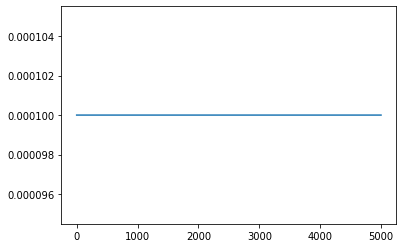

In [189]:
plt.plot(model.lr_change)